In [1]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.exceptions import ConvergenceWarning

Demand curve modelization for two items market:
 item 1 cost : 10     
 item 2 cost : 15 
 max price : 80 
 num buyers total : 220    
 Furthermore we know 20 are interested in buying both the products     
 Time duration : 1000 
 Discretization of the price space : 100 



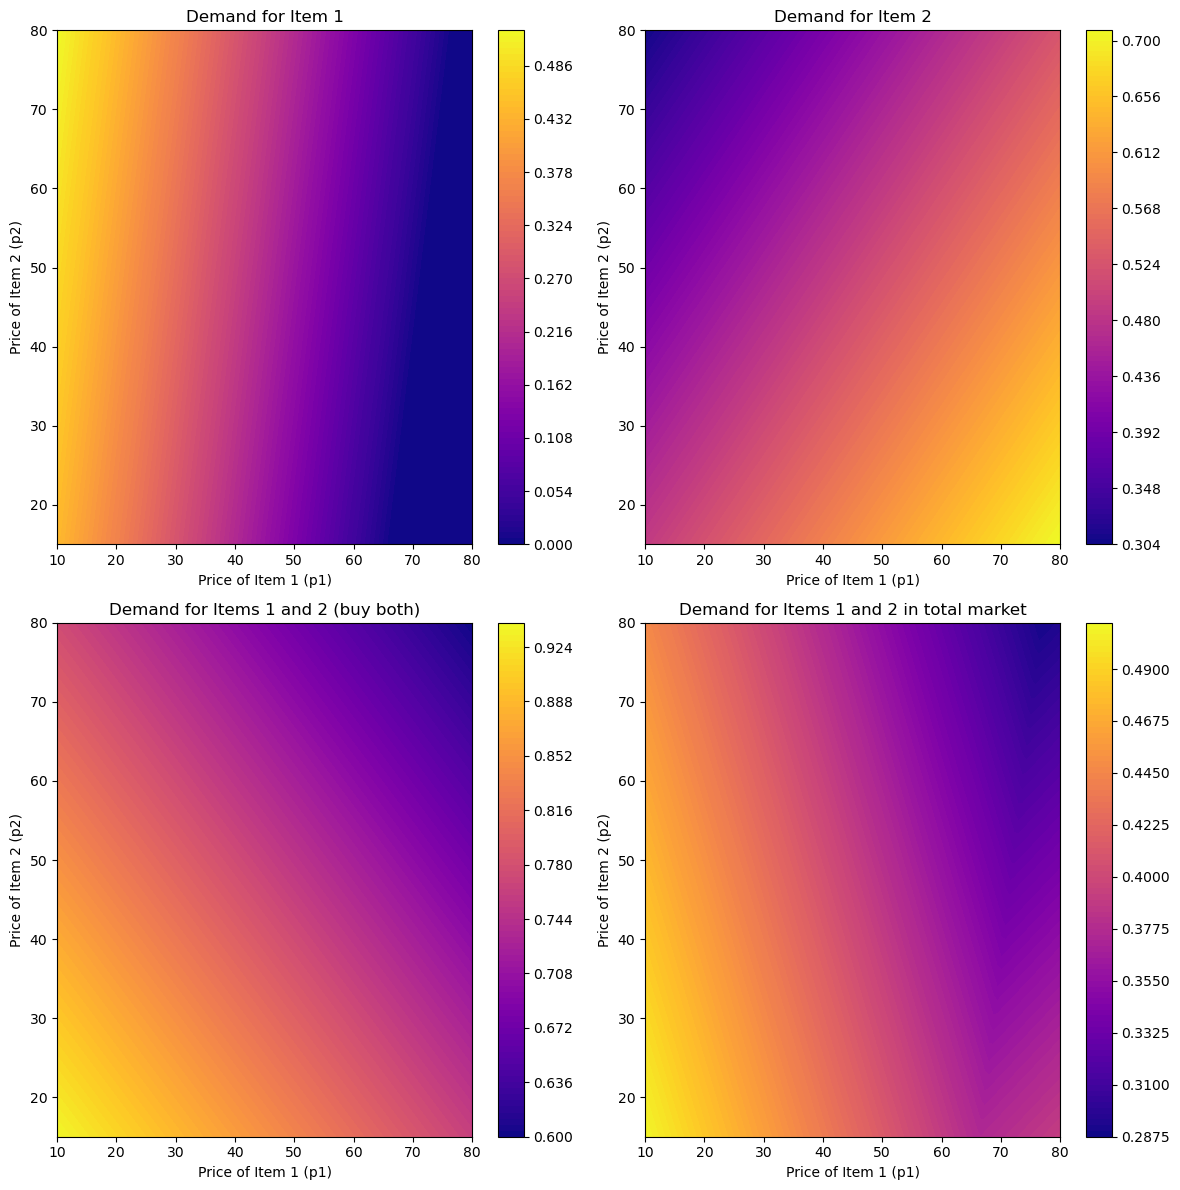

In [9]:

T = 1000 # time duration
discr = 100 # discretization of the price space

#num buyers
num_buyers_market1 = 100
num_buyers_market2 = num_buyers_market1
num_buyers_both = 20
num_total_buyers = num_buyers_market1 + num_buyers_market2 + num_buyers_both

#price parameters
cost1 = 10
cost2 = 15
min_price1 = cost1
min_price2 = cost2
max_price = 80

#item 1 parameters
beta1 = 1.25   #sensitivity item 1    1.1
gamma1 = 0.2  #cross effect item     0.2

#item 2 parameters
beta2 = 0.45   #sensitivity item 2   0.4
gamma2 = 0.5  #cross effect item 2  0.6

#item both parameter
both_factor = 0.2

print(f"Demand curve modelization for two items market:\n Item 1 cost : {cost1} \
    \n Item 2 cost : {cost2} \n Max price : {max_price} \n Num buyers total : {num_total_buyers}\
    \n Furthermore we know {num_buyers_both} are interested in buying both the products \
    \n Time duration : {T} \n Discretization of the price space : {discr} \n")

#demand curves for the items
curve1 = lambda p1,p2 : np.maximum(0,(1 - beta1 * (p1/max_price) + gamma1 * (p2/max_price)))
curve2 = lambda p1,p2 : np.maximum(0,(1 - beta2 * (p2/max_price) + gamma2 * (p1/max_price)))
curve_both = lambda p1,p2 : np.maximum(0, (1 - both_factor * (p1/max_price) - both_factor * (p2/max_price)))

#for the population willing to buy only one item
d1 = lambda p1,p2: np.minimum(2, curve1(p1,p2) )/2
d2 = lambda p1,p2: np.minimum(2, curve2(p1,p2) )/2

#for the population we know want to buy both the items
d_both = lambda p1,p2: curve_both(p1,p2)

#a user will buy a product according to demand curve in the group he belongs

#d_total = lambda p1,p2: np.minimum(2, d1(p1,p2) + d2(p1,p2) + d_both(p1,p2))/2
d_total = lambda p1,p2: (num_buyers_market1/num_total_buyers) * d1(p1,p2) \
                         + (num_buyers_market2/num_total_buyers) * d2(p1,p2) \
                         + (num_buyers_both/num_total_buyers) * curve_both(p1,p2)

#combined_demand = lambda p1,p2 : np.minimum(3, curve1(p1,p2) + curve2(p1,p2))/3 #considering both the markets: people

# Create a 3D plot
price_range1 = np.linspace(min_price1, max_price, discr)
price_range2 = np.linspace(min_price2, max_price, discr)
p1, p2 = np.meshgrid(price_range1, price_range2)


# Plotting the demand curves
fig, axes = plt.subplots(2, 2, figsize=(12, 12), gridspec_kw={'height_ratios': [1, 1]})

# Plotting D1
ax1 = axes[0, 0]
img1 = ax1.contourf(p1, p2, d1(p1, p2), cmap='plasma', levels=100)
ax1.set_title('Demand for Item 1')
ax1.set_xlabel('Price of Item 1 (p1)')
ax1.set_ylabel('Price of Item 2 (p2)')
fig.colorbar(img1, ax=ax1)

# Plotting D2
ax2 = axes[0, 1]
img2 = ax2.contourf(p1, p2, d2(p1, p2), cmap='plasma', levels=100)
ax2.set_title('Demand for Item 2')
ax2.set_xlabel('Price of Item 1 (p1)')
ax2.set_ylabel('Price of Item 2 (p2)')
fig.colorbar(img2, ax=ax2)

# Plotting combined demand D1 + D2
ax3 = axes[1, 0]
img3 = ax3.contourf(p1, p2, d_both(p1,p2), cmap='plasma', levels=100)
ax3.set_title('Demand for Items 1 and 2 (buy both)')
ax3.set_xlabel('Price of Item 1 (p1)')
ax3.set_ylabel('Price of Item 2 (p2)')
fig.colorbar(img3, ax=ax3)

#axes[1, 1].axis('off')
ax4 = axes[1, 1]
img4 = ax4.contourf(p1, p2, d_total(p1,p2), cmap='plasma', levels=100)
ax4.set_title('Demand for Items 1 and 2 in total market')
ax4.set_xlabel('Price of Item 1 (p1)')
ax4.set_ylabel('Price of Item 2 (p2)')
fig.colorbar(img4, ax=ax4)

plt.tight_layout()
plt.show()


best price for item 1:  60.90909090909091
best price for item 2:  80.0
total profit :  5158.290289256198
Expected number of users that would buy for each population type at the found prices:
	Market 1:  12.41477272727273
	Market 2:  46.53409090909091
	Both markets:  12.954545454545453


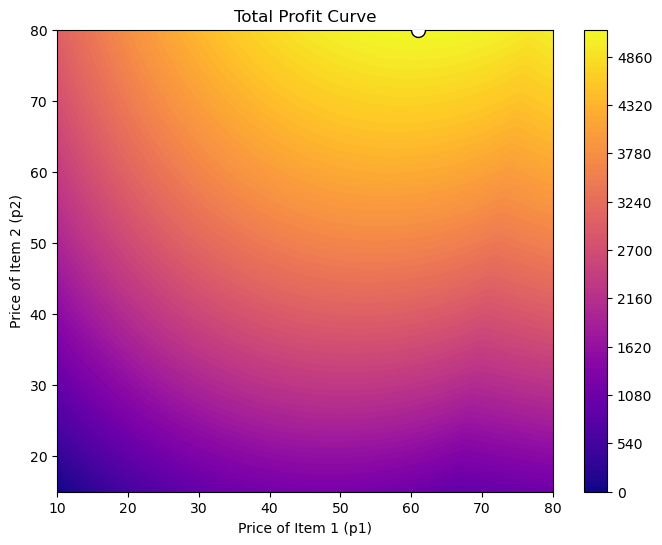

In [3]:
profit_curve = num_buyers_market1 * d1(p1,p2) * (p1 - cost1) + \
               num_buyers_market2 * d2(p1,p2) * (p2 - cost2) + \
               num_buyers_both    * d_both(p1,p2) * (p1 + p2 - cost1 - cost2)

max_profit_index = np.argmax(profit_curve)
max_profit_index = np.unravel_index(max_profit_index, profit_curve.shape)
max_p1, max_p2 = p1[max_profit_index], p2[max_profit_index]

print("best price for item 1: ", max_p1)
print("best price for item 2: ", max_p2)
print("total profit : ", profit_curve[max_profit_index])
print("Expected number of users that would buy for each population type at the found prices:")
print("\tMarket 1: ", num_buyers_market1 * d1(max_p1,max_p2))
print("\tMarket 2: ", num_buyers_market2 * d2(max_p1,max_p2))
print("\tBoth markets: ", num_buyers_both * d_both(max_p1,max_p2))

# Plotting the profit curve
fig, ax1 = plt.subplots(figsize=(8, 6))

img1 = ax1.contourf(p1, p2, profit_curve, cmap='plasma', levels=100)
ax1.set_title('Total Profit Curve')
ax1.set_xlabel('Price of Item 1 (p1)')
ax1.set_ylabel('Price of Item 2 (p2)')
fig.colorbar(img1, ax=ax1)
ax1.scatter(max_p1, max_p2, color='white', edgecolor='black', s=100, zorder=5)


plt.show()

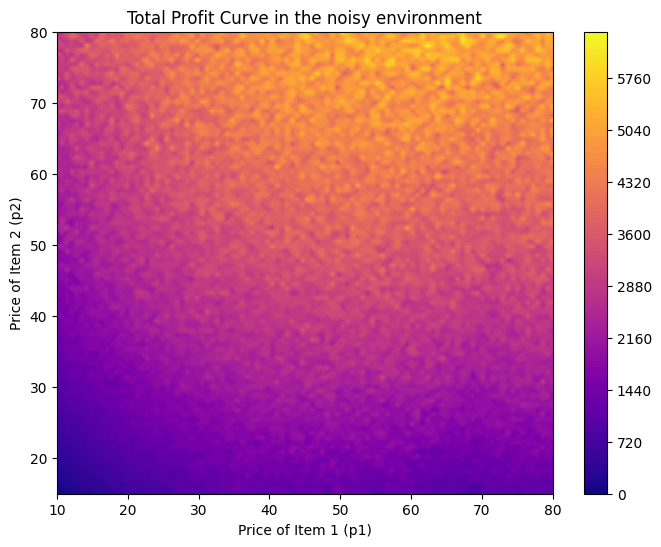

In [107]:
#environment

class MultiDimensionalPricingEnv:

    def __init__(self, probability, cost, n_population):
        self.probability = probability
        self.cost = cost
        self.n_population = n_population

    def round(self, p1, p2):
        cost1 =  self.cost[0]
        cost2 = self.cost[1]
        #get the number of buyers
        d_t_1 = np.random.binomial(self.n_population[0], self.probability[0](p1,p2))
        d_t_2 = np.random.binomial(self.n_population[1], self.probability[1](p1,p2))
        d_t_both = np.random.binomial(self.n_population[2], self.probability[2](p1,p2))

        d_t = d_t_1 + d_t_2 + d_t_both
        r_t = (p1 - cost1) * d_t_1 + (p2 - cost2) * d_t_2 + (p1 + p2 - cost1 - cost2) * d_t_both
        return d_t, r_t

#Clairvoyant
expected_clairvoyant_rewards = np.repeat(profit_curve[max_profit_index], T)

#plot the environment
env = MultiDimensionalPricingEnv(np.array([d1 , d2 , d_both]) , np.array([cost1 , cost2]), np.array([num_buyers_market1 , num_buyers_market2 , num_buyers_both]))

env_profits = []

for pr2 in price_range2:
    for pr1 in price_range1:
        _ , r_t = env.round(pr1, pr2)
        env_profits.append(r_t)

# Plotting the profit curve
fig, ax1 = plt.subplots(figsize=(8, 6))

env_profits = np.array(env_profits).reshape(discr,discr)

img1 = ax1.contourf(price_range1,price_range2, env_profits , cmap='plasma', levels=100)
ax1.set_title('Total Profit Curve in the noisy environment')
ax1.set_xlabel('Price of Item 1 (p1)')
ax1.set_ylabel('Price of Item 2 (p2)')
fig.colorbar(img1, ax=ax1)

plt.show()

In [86]:
class GPUCBAgent:
    def __init__(self, T, prices, discretization, rbf_length_scale=1.0):
        self.T = T
        self.prices = prices
        self.discretization = discretization
        self.scaler = StandardScaler()
        self.normalized_arms, self.arms = self.init_arms()
        kernel = C() * RBF(length_scale=rbf_length_scale)
        self.gp = GaussianProcessRegressor(kernel=kernel)
        self.action_t = None
        self.reward_history = []
        self.action_history = []
        self.mu_t = np.zeros(len(self.arms))
        self.sigma_t = np.zeros(len(self.arms))
        self.gamma = lambda t: np.log(t + 1) ** 2
        self.beta = lambda t: 1 + 0.5 * np.sqrt(2 * (self.gamma(t) + 1 + np.log(T)))
        self.n_pulls = np.zeros(len(self.arms))
        self.t = 0

    def init_arms(self):
        arms = np.array(np.meshgrid(self.prices[0], self.prices[1])).T.reshape(-1, 2)
        normalized_arms = self.scaler.fit_transform(arms)
        return normalized_arms, arms

    def pull_arm(self):
        warnings.simplefilter('ignore', category= ConvergenceWarning)
        warnings.simplefilter('ignore', category=UserWarning)
        self.mu_t, self.sigma_t = self.gp.predict(self.normalized_arms, return_std=True)
        ucbs = self.mu_t + self.beta(self.t) * self.sigma_t
        self.action_t = np.argmax(ucbs)
        return self.arms[self.action_t]

    def update(self, reward_t):
        chosen_arm = self.normalized_arms[self.action_t]
        self.n_pulls[self.action_t] += 1
        self.reward_history.append(reward_t)
        self.action_history.append(chosen_arm)
        self.gp.fit(self.action_history, self.reward_history)
        self.t += 1

In [88]:
env = MultiDimensionalPricingEnv(np.array([d1 , d2 , d_both]) , np.array([cost1 , cost2]), np.array([num_buyers_market1 , num_buyers_market2 , num_buyers_both]))

agent = GPUCBAgent(T, (price_range1, price_range2), discretization = discr)

# simulation
agent_rewards = np.array([])

for t in range(T):
    prices_t = agent.pull_arm()
    _ , reward_t = env.round(prices_t[0], prices_t[1])
    agent.update(reward_t)
    agent_rewards = np.append(agent_rewards, reward_t)

    if t%100 == 0:
      print(f'time: {t}')

cumulative_regret = np.cumsum(expected_clairvoyant_rewards - agent_rewards)

time: 0
time: 100
time: 200
time: 300
time: 400
time: 500
time: 600
time: 700
time: 800
time: 900


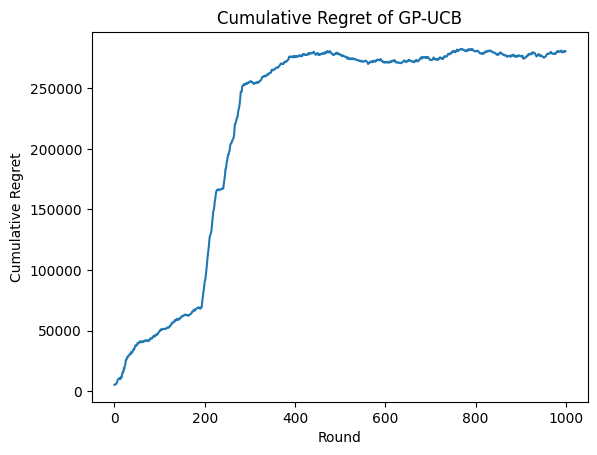

In [89]:
plt.plot(cumulative_regret, label='Mulidimensional GP-UCB Cumulative Regret')
plt.xlabel('Round')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret of GP-UCB')
plt.show()

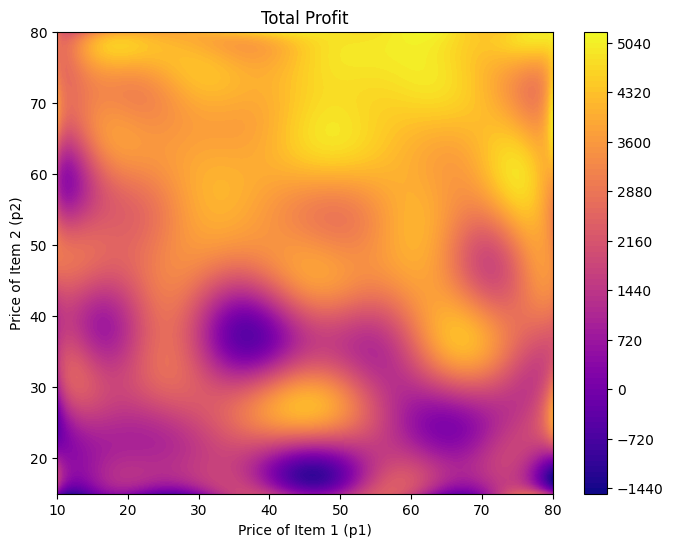

In [104]:
#recostruction

mu_t = agent.mu_t.reshape(discr, discr).T
fig, ax1 = plt.subplots(figsize=(8, 6))

img1 = ax1.contourf(price_range1 , price_range2, mu_t, cmap='plasma', levels=100)
ax1.set_title('Total Profit')
ax1.set_xlabel('Price of Item 1 (p1)')
ax1.set_ylabel('Price of Item 2 (p2)')
fig.colorbar(img1, ax=ax1)

plt.show()

In [105]:
max_profit_index = np.argmax(mu_t)
max_profit_index = np.unravel_index(max_profit_index, mu_t.shape)
max_p1, max_p2 = p1[max_profit_index], p2[max_profit_index]
print("Best price for item1 found: ", max_p1)
print("Best price for item2 found: ", max_p2)

Best price for item1 found:  61.61616161616162
Best price for item2 found:  80.0
